## 퍼셉트론 (Perceptron)

- 퍼셉트론은 논리 게이트를 모방할 수 있는 인공 신경망의 한 종류이다.
- 가중치와 편향을 통해 논리 게이트와 같은 동작을 한다.

In [1]:
import numpy as np

In [2]:
class Perceptron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        
    def activate(self, X):  # perceptron 연산
        return 1 if np.dot(self.weights, X) + self.bias > 0 else 0

In [3]:
test_cases = [(0,0), (0, 1), (1,0), (1,1)]

In [4]:
AND_gate = Perceptron(weights=[0.5, 0.5], bias= -0.7)

for test in test_cases:
    print(f'input: {test} | output: {AND_gate.activate(test)}')

input: (0, 0) | output: 0
input: (0, 1) | output: 0
input: (1, 0) | output: 0
input: (1, 1) | output: 1


In [5]:
OR_gate  = Perceptron(weights=[0.5, 0.5], bias= -0.2)

for test in test_cases:
    print(f'input: {test} | output: {OR_gate.activate(test)}')

input: (0, 0) | output: 0
input: (0, 1) | output: 1
input: (1, 0) | output: 1
input: (1, 1) | output: 1


In [6]:
NAND_gate = Perceptron(weights=[-0.5, -0.5], bias=0.7)

for test in test_cases:
    print(f'input: {test} | output: {NAND_gate.activate(test)}')

input: (0, 0) | output: 1
input: (0, 1) | output: 1
input: (1, 0) | output: 1
input: (1, 1) | output: 0


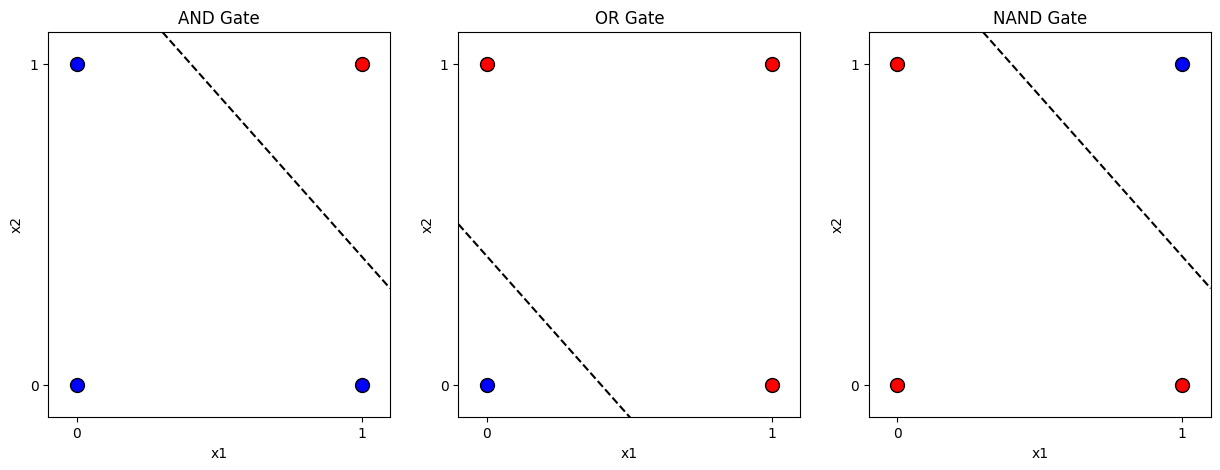

In [7]:
# 시긱화
import matplotlib.pyplot as plt

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
gates = {
    'AND' : AND_gate,
    'OR' : OR_gate,
    'NAND' : NAND_gate
}

fig, axes = plt.subplots(1, 3 , figsize=(15,5))

for idx, (gate_name, Perceptron) in enumerate(gates.items()):
    ax = axes[idx]
    outputs = np.array([Perceptron.activate(x) for x in inputs])
    
    # input 값을 결과에 따라 산점도로 표시
    for (x1, x2), y in zip(inputs, outputs):
        ax.scatter(x1,x2, c='red' if y == 1 else 'blue', s=100, edgecolor='black')
    
    # 결정 경계 표현    
    x_vals = np.linspace(-0.1, 1.1, 100)
    y_vals = (-Perceptron.weights[0] * x_vals - Perceptron.bias) / Perceptron.weights[1]
    ax.plot(x_vals, y_vals, 'k--')
    
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_title(f'{gate_name} Gate')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    
plt.show()

### XOR gate 


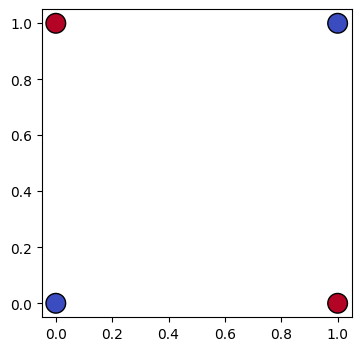

In [9]:
# XOR 데이터 생성
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y =np.array([0, 1, 1, 0])

# 시각화
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=200, edgecolors='black', cmap='coolwarm')
plt.show()

#  다층 퍼셉트론 (Multi-Layer Perceptron, MLP)

In [11]:
def XOR_gate(x1, x2):
    nand_out = NAND_gate.activate([x1, x2])
    or_out = OR_gate.activate([x1, x2])
    return AND_gate.activate([nand_out, or_out])

In [14]:
for x1, x2 in test_cases:
    print(f'input: {x1}, {x2} | output: {XOR_gate(x1, x2)}')

input: 0, 0 | output: 0
input: 0, 1 | output: 1
input: 1, 0 | output: 1
input: 1, 1 | output: 0


In [23]:
from sklearn.neural_network import MLPClassifier

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y =np.array([0, 1, 1, 0])

mlp = MLPClassifier(
    hidden_layer_sizes=(4, 4),    # 은닉층의 크기
    activation='relu',          # 활성화 함수
    solver='adam',              # 가중치 업데이트 방식(최적화 알고리즘)
    max_iter=1000,              # 모델의 학습 반복 횟수(epoch)
    random_state=42             # 가중치 초기화 값 고정
)
mlp.fit(X, y)

pred = mlp.predict(X)
for i in range(4):
    print(f'XOR({X[i][0]}, {X[i][1]}), {pred[i]}')

XOR(0, 0), 0
XOR(0, 1), 1
XOR(1, 0), 1
XOR(1, 1), 0


/opt/anaconda3/envs/pystudy_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y =np.array([0, 1, 1, 0])

hidden_layers = [(1,), (2,), (4,), (8,)]

for config in hidden_layers:
    mlp = MLPClassifier(
        hidden_layer_sizes = config,    # 은닉층의 크기
        activation='tanh',          # 활성화 함수
        solver='lbfgs',              # 가중치 업데이트 방식(최적화 알고리즘)
        max_iter=5000,              # 모델의 학습 반복 횟수(epoch)
        random_state=42             # 가중치 초기화 값 고정
    )
    mlp.fit(X, y)

    pred = mlp.predict(X)
    print(f'은닉층 구조 {config} -> XOR 예측 결과: {pred}')

은닉층 구조 (1,) -> XOR 예측 결과: [0 1 1 1]
은닉층 구조 (2,) -> XOR 예측 결과: [1 0 1 0]
은닉층 구조 (4,) -> XOR 예측 결과: [0 1 1 0]
은닉층 구조 (8,) -> XOR 예측 결과: [0 1 1 0]
